# Install required packages and libraries

In [2]:
# Pandas to wrangle the data
import pandas as pd

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
import geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab
usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries imported.


In [3]:
# Get New York City locationg from geolocator
addressNY = 'New York City, NY'

geolocatorNY = Nominatim(user_agent="ny_explorer")
locationNY = geolocatorNY.geocode(addressNY)
latitudeNY = locationNY.latitude
longitudeNY = locationNY.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitudeNY, longitudeNY))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [4]:
# Using geopy library to get the latitude and longitude values of Prudencial center and Barclays center.
# In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent prudencial_explorer and barclays_explorer, as shown below.
name1 = 'Prudencial center'
address1 = '25 Lafayette St, New Jersey, NJ'

geolocator1 = Nominatim(user_agent="prudencial_explorer")
location1 = geolocator1.geocode(address1)
latitude1 = location1.latitude
longitude1 = location1.longitude
print('The geograpical coordinate of Prudencial Center are {}, {}.'.format(latitude1, longitude1))

name2 = 'Barclays Center'
address2 = '620 Atlantic Ave, New York, NY'

geolocator2 = Nominatim(user_agent="prudencial_explorer")
location2 = geolocator2.geocode(address2)
latitude2 = location2.latitude
longitude2 = location2.longitude
print('The geograpical coordinate of Barclays Center are {}, {}.'.format(latitude2, longitude2))

The geograpical coordinate of Prudencial Center are 40.733404699999994, -74.17116464386132.
The geograpical coordinate of Barclays Center are 40.6826108, -73.97527899757287.


# Map of New York with arena signs

In [5]:
# create map of New York using latitude and longitude values with info signs of both Arenas
map_newyork = folium.Map(location=[latitudeNY, longitudeNY], zoom_start=12)

folium.Marker(
    location=[latitude1, longitude1],
    popup=name1,
    icon=folium.Icon(color='green', icon='info-sign')
).add_to(map_newyork)

folium.Marker(
    location=[latitude2, longitude2],
    popup=name2,
    icon=folium.Icon(color='red', icon='info-sign')
).add_to(map_newyork)

    
map_newyork

In [6]:
# @hidden_cell
CLIENT_ID = 'E2GGEBIQZR2MNDED0VSETSAYNND3MT1ILOOWS1Z2OFVYVNGH' # your Foursquare ID
CLIENT_SECRET = 'LETSFQDEXPEZVVT1MR1XEHTIQPMNVPH4G0PY1551G1VZXAZN' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Foursquare credentails imported')

Foursquare credentails imported


# Getting restaurants within 500 metres from the both locations

In [7]:
# Define a query to search for restaurants that is within 500 metres from the both locations
search_query = 'Restaurant'
radius = 500
print(search_query + ' .... OK!')

Restaurant .... OK!


In [8]:
url1 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude1, longitude1, VERSION, search_query, radius, LIMIT)

In [9]:
results = requests.get(url1).json()
results

{'meta': {'code': 200, 'requestId': '5ec36c271835dd0028050c2a'},
 'response': {'venues': [{'id': '4d712b241529a143144a97a0',
    'name': 'Mulberry Restaurant and Pizzeria',
    'location': {'address': '258 Mulberry St',
     'crossStreet': 'at Elm St',
     'lat': 40.729992201730944,
     'lng': -74.17182762281222,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.729992201730944,
       'lng': -74.17182762281222}],
     'distance': 383,
     'postalCode': '07102',
     'cc': 'US',
     'city': 'Newark',
     'state': 'NJ',
     'country': 'United States',
     'formattedAddress': ['258 Mulberry St (at Elm St)',
      'Newark, NJ 07102',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d110941735',
      'name': 'Italian Restaurant',
      'pluralName': 'Italian Restaurants',
      'shortName': 'Italian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1

In [10]:
# assign relevant part of JSON to Restaurants near Prudencial Center
restaurants1 = results['response']['venues']

# tranform venues into a dataframe
restaurantsPrudencial = json_normalize(restaurants1)
restaurantsPrudencial.head()

C:\Users\U700136\AppData\Local\Continuum\anaconda3\envs\BattleOfArenas\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.state,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id
0,4d712b241529a143144a97a0,Mulberry Restaurant and Pizzeria,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1589865679,False,258 Mulberry St,at Elm St,40.729992,-74.171828,"[{'label': 'display', 'lat': 40.72999220173094...",...,NJ,United States,"[258 Mulberry St (at Elm St), Newark, NJ 07102...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,59e683c7a92d9814d5eaf7fc,Prudential Restaurant,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",v-1589865679,False,165 Mulberry St,NaN,40.733630,-74.171063,"[{'label': 'display', 'lat': 40.73362956709005...",...,NJ,United States,"[165 Mulberry St, Newark, NJ 07102, United Sta...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4f44ec0619836ed001977c7a,Sheng Heng Restaurant,"[{'id': '4d4b7105d754a06374d81259', 'name': 'F...",v-1589865679,False,58 Green St,NaN,40.731714,-74.171362,"[{'label': 'display', 'lat': 40.73171400000000...",...,NJ,United States,"[58 Green St, Newark, NJ 07102, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54492f83498ea61e41830f7e,Lebanese Restaurant,"[{'id': '4bf58dd8d48988d115941735', 'name': 'M...",v-1589865679,False,NaN,NaN,40.730263,-74.166069,"[{'label': 'display', 'lat': 40.73026275634765...",...,NJ,United States,"[Newark, NJ, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4f323a9c19836c91c7c2e01f,El Merengue Restaurant,"[{'id': '4d4b7105d754a06374d81259', 'name': 'F...",v-1589865679,False,920 Broad St,NaN,40.732012,-74.174165,"[{'label': 'display', 'lat': 40.732012, 'lng':...",...,NJ,United States,"[920 Broad St, Newark, NJ 07102, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
restaurantsPrudencial.shape

(29, 24)

In [12]:
nearPrudencial = restaurantsPrudencial.filter(['name', 'location.lat', 'location.lng', 'location.address', 'id'], axis=1)
nearPrudencial.head()

,name,location.lat,location.lng,location.address,id
0,Mulberry Restaurant and Pizzeria,40.729992,-74.171828,258 Mulberry St,4d712b241529a143144a97a0
1,Prudential Restaurant,40.733630,-74.171063,165 Mulberry St,59e683c7a92d9814d5eaf7fc
2,Sheng Heng Restaurant,40.731714,-74.171362,58 Green St,4f44ec0619836ed001977c7a
3,Lebanese Restaurant,40.730263,-74.166069,NaN,54492f83498ea61e41830f7e
4,El Merengue Restaurant,40.732012,-74.174165,920 Broad St,4f323a9c19836c91c7c2e01f


In [13]:
url2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude2, longitude2, VERSION, search_query, radius, LIMIT)
results2 = requests.get(url2).json()
results2
# assign relevant part of JSON to Restaurants near Barclays Center
restaurants2 = results2['response']['venues']

# tranform venues into a dataframe
restaurantsBarclays = json_normalize(restaurants2)
restaurantsBarclays.head()

C:\Users\U700136\AppData\Local\Continuum\anaconda3\envs\BattleOfArenas\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,...,location.formattedAddress,location.crossStreet,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id,location.neighborhood
0,4f3265de19836c91c7d3ddd7,Restaurant New Orleans,"[{'id': '4d4b7105d754a06374d81259', 'name': 'F...",v-1589865680,False,747 Fulton St,40.686515,-73.974644,"[{'label': 'display', 'lat': 40.686515, 'lng':...",437,...,"[747 Fulton St, Brooklyn, NY 11217, United Sta...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46cb0dedf964a5202a4a1fe3,Alchemy Restaurant & Bar,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",v-1589865680,False,56 5th Ave,40.681344,-73.977200,"[{'label': 'display', 'lat': 40.68134351954853...",214,...,"[56 5th Ave (btwn Bergen St. & St. Marks Pl.),...",btwn Bergen St. & St. Marks Pl.,340244,https://www.seamless.com/menu/alchemy-restaura...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,83450072,NaN
2,4f32312919836c91c7bf3250,Restaurant Gia,"[{'id': '4d4b7105d754a06374d81259', 'name': 'F...",v-1589865680,False,68 Lafayette Ave,40.686981,-73.975181,"[{'label': 'display', 'lat': 40.686981, 'lng':...",486,...,"[68 Lafayette Ave, Brooklyn, NY 11217, United ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,570136d2498e512559842bc0,Punta Cana Restaurant,"[{'id': '4bf58dd8d48988d1be941735', 'name': 'L...",v-1589865680,False,NaN,40.681469,-73.976826,"[{'label': 'display', 'lat': 40.681469, 'lng':...",182,...,"[Brooklyn, NY, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4f323b4419836c91c7c320dc,King Kong Chinese Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1589865680,False,66 6th Ave,40.680910,-73.974421,"[{'label': 'display', 'lat': 40.68091, 'lng': ...",202,...,"[66 6th Ave, Brooklyn, NY 11217, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
restaurantsBarclays.shape

(33, 25)

In [15]:
nearBarclays = restaurantsBarclays.filter(['name', 'location.lat', 'location.lng', 'location.address', 'id'], axis=1)
nearBarclays.head()

,name,location.lat,location.lng,location.address,id
0,Restaurant New Orleans,40.686515,-73.974644,747 Fulton St,4f3265de19836c91c7d3ddd7
1,Alchemy Restaurant & Bar,40.681344,-73.977200,56 5th Ave,46cb0dedf964a5202a4a1fe3
2,Restaurant Gia,40.686981,-73.975181,68 Lafayette Ave,4f32312919836c91c7bf3250
3,Punta Cana Restaurant,40.681469,-73.976826,NaN,570136d2498e512559842bc0
4,King Kong Chinese Restaurant,40.680910,-73.974421,66 6th Ave,4f323b4419836c91c7c320dc


In [16]:
# test how id is shown to describe search for venue rating
for row in nearPrudencial['id']:
    venue_id = row
    print(venue_id)
    

4d712b241529a143144a97a0
59e683c7a92d9814d5eaf7fc
4f44ec0619836ed001977c7a
54492f83498ea61e41830f7e
4f323a9c19836c91c7c2e01f
4f329f3719836c91c7e9aaac
4f32824319836c91c7deb2c8
4f32071f19833175d60b20ff
4f32235519836c91c7b9d969
4e4c901abd413c4cc66a5339
59adb5259ef8ef7b9dec3b7e
4f32929219836c91c7e4e9b7
522219e411d252b1937ee3c7
4c4a30af959220a13978c30d
4f32a16219836c91c7ea7b9e
4eda5c7293ad464d2873f04a
54cc8665498e52efb1fea82e
4f32047719833175d60a1cea
4e5cce4c1495cac4193ddb6c
52d1ca9f498e318bf8c64ddf
538f59c4498e90d68acf1e83
58f16cc28f2c1a558cf1d06f
4bd0801ccaff9521b8eccef0
4ba5443af964a520c3f338e3
4bdb5b0963c5c9b6cc8b2768
4ba39fd0f964a520304d38e3
4bc6689951b376b052981b6f
4baeecc3f964a5202ce23be3
4b50991af964a520d42827e3


# Loop to get venue ratings
Now get venue rating for all restaurants in both dataframes (nearPrudencial and nearBarclays) from Foursquare API

Import time for sleep timer between loops

In [17]:
# Import time for sleep timer to ensure compliance with Foursquare API guidelines
import time 

ratings1 = pd.DataFrame(columns=['id', 'rating'])
ratings2 = pd.DataFrame(columns=['id', 'rating'])

def foursquare(row):
    venue_id = row # ID of the restaurant
    queFQ = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(queFQ).json()
    try:
        dict1 = {'id':'0000', 'rating':'0000'}
        print(result['response']['venue']['rating'])
        dict1.update({'id':venue_id, 'rating':result['response']['venue']['rating']})
        return dict1
    except:
        dict2 = {'id':'0000', 'rating':'0000'}
        print('0') # If there is no venue rating for restaurant we use 99 value to short them later
        dict2.update({'id':venue_id, 'rating':99})
        return dict2
    
        
for row in nearPrudencial['id']:
    time.sleep(2),
    query1 = row
    addThis = foursquare(query1)
    ratings1 = ratings1.append(addThis, ignore_index=True)
   
    
#for row in nearBarclays['id']:
#    time.sleep(2),
#    ratings2 = ratings2.append({'id': ['id'], 'rating': ['rating']}, ignore_index=True)


7.3
0
0
0
0
0
0
0
0
0
0
0
0
9.1
0
0
0
0
0
7.5
0
0
7.2
6.7
8.3
7.7
0
5.6
0


In [18]:
ratings1

,id,rating
0,4d712b241529a143144a97a0,7.3
1,59e683c7a92d9814d5eaf7fc,99.0
2,4f44ec0619836ed001977c7a,99.0
3,54492f83498ea61e41830f7e,99.0
4,4f323a9c19836c91c7c2e01f,99.0
5,4f329f3719836c91c7e9aaac,99.0
6,4f32824319836c91c7deb2c8,99.0
7,4f32071f19833175d60b20ff,99.0
8,4f32235519836c91c7b9d969,99.0
9,4e4c901abd413c4cc66a5339,99.0


# Dropping rows of restaurants that doesn't have rating (=99) in Foursquare data

In [19]:
ratingsShorted1 = ratings1[ratings1.rating != 99]
ratingsShorted1

,id,rating
0,4d712b241529a143144a97a0,7.3
13,4c4a30af959220a13978c30d,9.1
19,52d1ca9f498e318bf8c64ddf,7.5
22,4bd0801ccaff9521b8eccef0,7.2
23,4ba5443af964a520c3f338e3,6.7
24,4bdb5b0963c5c9b6cc8b2768,8.3
25,4ba39fd0f964a520304d38e3,7.7
27,4baeecc3f964a5202ce23be3,5.6


# Merge dataframes together

In [20]:
resultPrudencial = pd.merge(ratingsShorted1, nearPrudencial, on=['id'], how='inner')
resultPrudencial

,id,rating,name,location.lat,location.lng,location.address
0,4d712b241529a143144a97a0,7.3,Mulberry Restaurant and Pizzeria,40.729992,-74.171828,258 Mulberry St
1,4c4a30af959220a13978c30d,9.1,Delicias De Minas Restaurante,40.726899,-74.168288,168 McWhorter St
2,52d1ca9f498e318bf8c64ddf,7.5,La Rouge Restaurant & Lounge,40.730157,-74.175158,972 Broad St
3,4bd0801ccaff9521b8eccef0,7.2,Dario's Restaurant,40.737399,-74.172631,20 Academy St
4,4ba5443af964a520c3f338e3,6.7,Prudential Center Acela Club,40.733814,-74.170687,165 Mulberry St
5,4bdb5b0963c5c9b6cc8b2768,8.3,Chateau of Spain,40.731160,-74.173880,11 Franklin St
6,4ba39fd0f964a520304d38e3,7.7,Francesca's Pizza & Pasta,40.729695,-74.166778,81 McWhorter St.
7,4baeecc3f964a5202ce23be3,5.6,Subway,40.737189,-74.171077,730 Broad St


# Now do the same for Barclays center

In [21]:
for row in nearBarclays['id']:
    time.sleep(2),
    query1 = row
    addThis = foursquare(query1)
    ratings2 = ratings1.append(addThis, ignore_index=True)


0
7.4
0
0
0
0
4.9
0
0
0
0
0
0
0
0
7.2
7.8
5.3
5.8
6.6
7.4
7.1
8.3
7.4
7.2
9.0
0
0
9.0
8.5
6.4
0
8.5


In [24]:
ratings2

,id,rating
0,4d712b241529a143144a97a0,7.3
1,59e683c7a92d9814d5eaf7fc,99.0
2,4f44ec0619836ed001977c7a,99.0
3,54492f83498ea61e41830f7e,99.0
4,4f323a9c19836c91c7c2e01f,99.0
5,4f329f3719836c91c7e9aaac,99.0
6,4f32824319836c91c7deb2c8,99.0
7,4f32071f19833175d60b20ff,99.0
8,4f32235519836c91c7b9d969,99.0
9,4e4c901abd413c4cc66a5339,99.0


In [23]:
ratingsShorted2 = ratings2[ratings2.rating != 99]
resultBarclays = pd.merge(ratingsShorted2, nearBarclays, on=['id'], how='inner')
resultBarclays

,id,rating,name,location.lat,location.lng,location.address
0,43261680f964a520b6271fe3,8.5,Miriam,40.680282,-73.977777,79 5th Ave


In [31]:
ratingsShorted2

,id,rating
0,4d712b241529a143144a97a0,7.3
13,4c4a30af959220a13978c30d,9.1
19,52d1ca9f498e318bf8c64ddf,7.5
22,4bd0801ccaff9521b8eccef0,7.2
23,4ba5443af964a520c3f338e3,6.7
24,4bdb5b0963c5c9b6cc8b2768,8.3
25,4ba39fd0f964a520304d38e3,7.7
27,4baeecc3f964a5202ce23be3,5.6
29,43261680f964a520b6271fe3,8.5


In [32]:
nearBarclays

,name,location.lat,location.lng,location.address,id
0,Restaurant New Orleans,40.686515,-73.974644,747 Fulton St,4f3265de19836c91c7d3ddd7
1,Alchemy Restaurant & Bar,40.681344,-73.977200,56 5th Ave,46cb0dedf964a5202a4a1fe3
2,Restaurant Gia,40.686981,-73.975181,68 Lafayette Ave,4f32312919836c91c7bf3250
3,Punta Cana Restaurant,40.681469,-73.976826,NaN,570136d2498e512559842bc0
4,King Kong Chinese Restaurant,40.680910,-73.974421,66 6th Ave,4f323b4419836c91c7c320dc
5,bergans pizzeria & restaurant,40.680733,-73.974427,NaN,52ab5ab0498e00b75fabfaf3
6,Yang No. 1 Asian Restaurant,40.686000,-73.974181,109 S Portland Ave,55971a86498ef2e7229297c7
7,Hiroto Japanese Restaurant,40.680523,-73.977668,75 5th Ave,55c7c04b498e12d8e11ea0e8
8,Star Grill & Bar Restaurant,40.683667,-73.978644,39-19 4th Ave,4c327fa5a0ced13a974b156e
9,Tony's Carroll Gardens Classic Deli Restaurant.,40.682014,-73.979861,NaN,4e4f48bf18383eb2af1fc749


# Now get bar ratings around both places for aftergame drinks with same method as above

In [33]:
# Define a query to search for bars that is within 500 metres from the both locations same as restaurants
search_query = 'Bar'
radius = 500
print(search_query + ' .... OK!')

Bar .... OK!


In [34]:
url3 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude1, longitude1, VERSION, search_query, radius, LIMIT)

results3 = requests.get(url3).json()
results3

# assign relevant part of JSON to Bars near Prudencial Center
bars1 = results3['response']['venues']

# tranform venues into a dataframe
barsPrudencial = json_normalize(bars1)
barsPrudencial.head()

barsNearPrudencial = barsPrudencial.filter(['name', 'location.lat', 'location.lng', 'location.address', 'id'], axis=1)
barsNearPrudencial.head()

C:\Users\U700136\AppData\Local\Continuum\anaconda3\envs\BattleOfArenas\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


,name,location.lat,location.lng,location.address,id
0,Dinosaur Bar-B-Que,40.734755,-74.170207,224 Market St,4f6a50ef1081b56a9458a51f
1,Stadium Bar & Grill,40.728873,-74.172255,NaN,5111c3d2e4b077779b8fb2a8
2,Market Street Bar And Grill,40.735222,-74.165271,Gateway Center - Raymond Blvd,50ca02c2245f2d4aa8c2bade
3,Budweiser Red Light Bar,40.733474,-74.171282,167 Mulberry St,59f506acb3d8e2102e2ddd6f
4,Jack Daniels Bar,40.732779,-74.170676,NaN,580be4ad38fa8cf0e05ab816


In [35]:
url4 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude2, longitude2, VERSION, search_query, radius, LIMIT)

results4 = requests.get(url4).json()
results4

# assign relevant part of JSON to Bars near Barclays Center
bars2 = results4['response']['venues']

# tranform venues into a dataframe
barsBarclays = json_normalize(bars2)
barsBarclays.head()

barsNearBarclays = barsBarclays.filter(['name', 'location.lat', 'location.lng', 'location.address', 'id'], axis=1)
barsNearBarclays.head()

C:\Users\U700136\AppData\Local\Continuum\anaconda3\envs\BattleOfArenas\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


,name,location.lat,location.lng,location.address,id
0,Burrito Bar & Kitchen,40.678302,-73.973275,307 Flatbush Ave,43c936c3f964a520992d1fe3
1,Applebee's Grill + Bar,40.684431,-73.977509,139 Flatbush Ave. Level 2,4be326bef07b0f47e039f743
2,126 Stoli Bar,40.683011,-73.973645,Barclay Center,51fd796c498e552539763f95
3,Bar Goto Niban,40.680963,-73.975542,474 Bergen St,5e3360281015ac00083969f9
4,BK9 Kitchen & Bar,40.681159,-73.977271,62 5th Ave,555fe4ab498e0bddb5ed061c


In [36]:
ratings3 = pd.DataFrame(columns=['id', 'rating'])
ratings4 = pd.DataFrame(columns=['id', 'rating'])

def foursquare(row):
    venue_id = row # ID of the restaurant
    queFQ = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(queFQ).json()
    try:
        dict1 = {'id':'0000', 'rating':'0000'}
        print(result['response']['venue']['rating'])
        dict1.update({'id':venue_id, 'rating':result['response']['venue']['rating']})
        return dict1
    except:
        dict2 = {'id':'0000', 'rating':'0000'}
        print('0') # If there is no venue rating for restaurant we use 99 value to short them later
        dict2.update({'id':venue_id, 'rating':99})
        return dict2
    

for row in barsNearPrudencial['id']:
    time.sleep(2),
    query1 = row
    addThis = foursquare(query1)
    ratings3 = ratings3.append(addThis, ignore_index=True)
    
for row in barsNearBarclays['id']:
    time.sleep(2),
    query1 = row
    addThis = foursquare(query1)
    ratings4 = ratings4.append(addThis, ignore_index=True)


7.4
0
5.1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
8.3
0
0
0
0
0
0
0
8.4
6.6
5.2
0
6.8
7.4
0
0
0
0
0
6.9
7.4
8.8
0
7.5
0
0
0
0
0
0
7.9
0
0
0
0
0
0
0
0
6.2
0
0
0
6.4
0
7.4
5.8
6.7
0
7.4
7.7
6.5
0
8.7
0
6.0
7.7
0
7.2


In [37]:
ratingsShorted3 = ratings3[ratings3.rating != 99]
resultBarsPrudencial = pd.merge(ratingsShorted3, barsNearPrudencial, on=['id'], how='inner')
resultBarsPrudencial

,id,rating,name,location.lat,location.lng,location.address
0,4f6a50ef1081b56a9458a51f,7.4,Dinosaur Bar-B-Que,40.734755,-74.170207,224 Market St
1,50ca02c2245f2d4aa8c2bade,5.1,Market Street Bar And Grill,40.735222,-74.165271,Gateway Center - Raymond Blvd
2,4a9f39cbf964a520f73c20e3,8.3,Hell's Kitchen Lounge,40.730742,-74.166669,150 Lafayette St
3,4b99212af964a5205b6335e3,8.4,McWhorter Barbeque,40.729685,-74.166817,104 McWhorter St


In [38]:
ratingsShorted4 = ratings4[ratings4.rating != 99]
resultBarsBarclays = pd.merge(ratingsShorted4, barsNearBarclays, on=['id'], how='inner')
resultBarsBarclays

,id,rating,name,location.lat,location.lng,location.address
0,43c936c3f964a520992d1fe3,6.6,Burrito Bar & Kitchen,40.678302,-73.973275,307 Flatbush Ave
1,4be326bef07b0f47e039f743,5.2,Applebee's Grill + Bar,40.684431,-73.977509,139 Flatbush Ave. Level 2
2,5e3360281015ac00083969f9,6.8,Bar Goto Niban,40.680963,-73.975542,474 Bergen St
3,555fe4ab498e0bddb5ed061c,7.4,BK9 Kitchen & Bar,40.681159,-73.977271,62 5th Ave
4,506f5cfee4b017acd4c68974,6.9,Honda Club at Barclays Center,40.682605,-73.975159,Barclays Center
5,46cb0dedf964a5202a4a1fe3,7.4,Alchemy Restaurant & Bar,40.681344,-73.977200,56 5th Ave
6,4b992b04f964a520726635e3,8.8,Barclays Center,40.682970,-73.975906,620 Atlantic Ave
7,57392d78498e7fdb53b33ec1,7.5,The Armory Bar,40.682157,-73.979693,67 4th Ave
8,50a01ab7e4b09c89238763c4,7.9,Brooklyn Farmacy at Barclay's Center,40.683059,-73.975781,NaN
9,5095b31be4b0a7ac715f2a6d,6.2,L&B Spumoni Gardens at the Barclays Center,40.683093,-73.975888,NaN


# Analysis

In [62]:
box5Prudencial = resultPrudencial.nlargest(5, ['rating'])

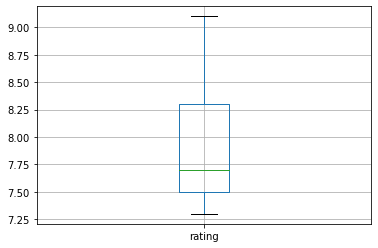

In [63]:
box5Prudencial.boxplot(column=['rating'])

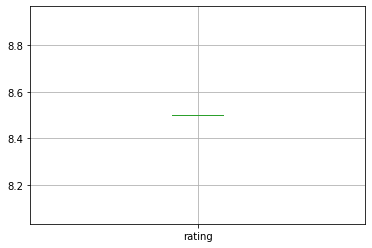

In [39]:
box5Barclays = resultBarclays.nlargest(5, ['rating'])
box5Barclays.boxplot(column=['rating'])

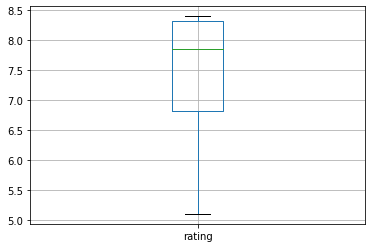

In [40]:
boxBar5Prudencial = resultBarsPrudencial.nlargest(5, ['rating'])
boxBar5Prudencial.boxplot(column=['rating'])

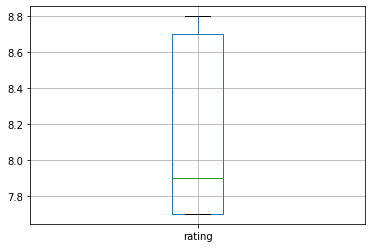

In [41]:
boxBar5Barclays = resultBarsBarclays.nlargest(5, ['rating'])
boxBar5Barclays.boxplot(column=['rating'])